In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('breast_cancer.csv')

In [17]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
print(df.shape)

(683, 10)


In [22]:
print(df.isnull().sum().sum())

0


In [23]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [52]:
plt.figure(figsize=(15,12))

<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

In [42]:
df.head(2)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2


Text(0.5, 1.0, 'Class')

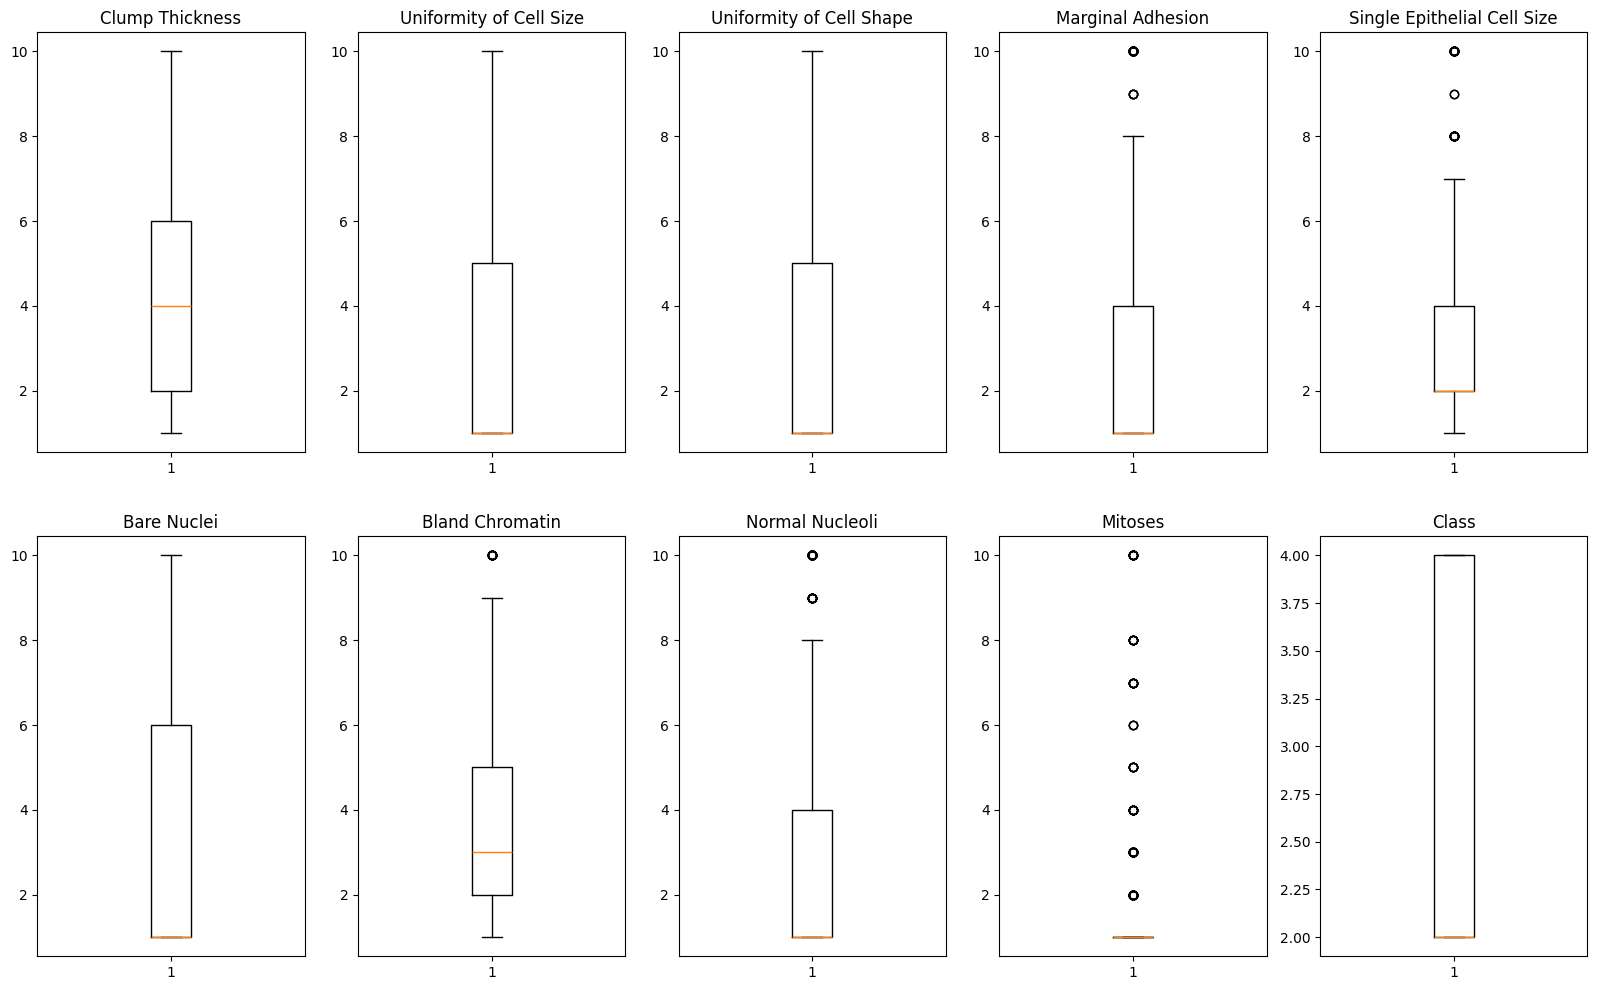

In [57]:
plt.figure(figsize=(20,12))

plt.subplot(2, 5, 1)
plt.boxplot(df['Clump Thickness'])
plt.title("Clump Thickness")

plt.subplot(2, 5, 2)
plt.boxplot(df['Uniformity of Cell Size'])
plt.title("Uniformity of Cell Size")

plt.subplot(2, 5, 3)
plt.boxplot(df['Uniformity of Cell Shape'])
plt.title('Uniformity of Cell Shape')

plt.subplot(2, 5, 4)
plt.boxplot(df['Marginal Adhesion'])
plt.title('Marginal Adhesion')

plt.subplot(2, 5, 5)
plt.boxplot(df['Single Epithelial Cell Size'])
plt.title('Single Epithelial Cell Size')

plt.subplot(2, 5, 6)
plt.boxplot(df['Bare Nuclei'])
plt.title('Bare Nuclei')

plt.subplot(2, 5, 7)
plt.boxplot(df['Bland Chromatin'])
plt.title('Bland Chromatin')

plt.subplot(2, 5, 8)
plt.boxplot(df['Normal Nucleoli'])
plt.title('Normal Nucleoli')

plt.subplot(2, 5, 9)
plt.boxplot(df['Mitoses'])
plt.title('Mitoses')

plt.subplot(2, 5, 10)
plt.boxplot(df['Class'])
plt.title('Class')

In [59]:
df['Class'].value_counts()

Class
2    444
4    239
Name: count, dtype: int64

In [60]:
## converting class value 2 and 4 to 1 and 2 
# because according to my search class 4 means cencer yes and class 2 means not

df['Class'].replace({2:0 , 4:1} , inplace=True)

In [85]:
df.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


<Axes: >

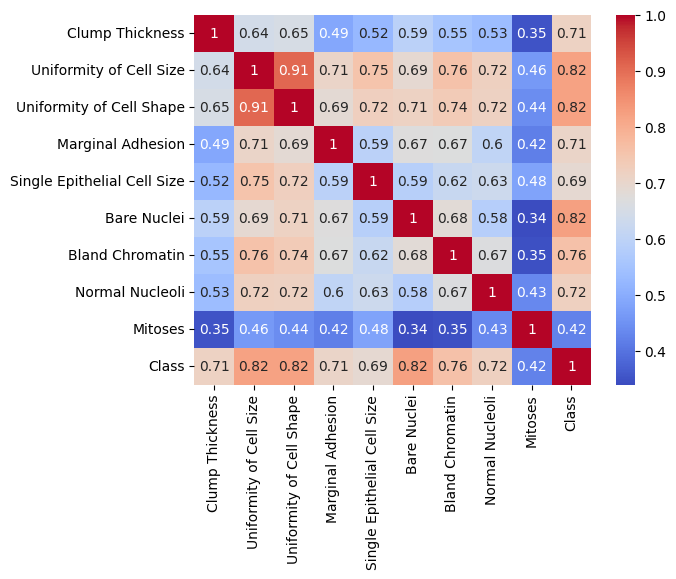

In [68]:
sns.heatmap(df.corr() , cmap='coolwarm' , annot=True)

In [78]:
X = df.drop(columns=['Class'] ,axis=1)
y = df['Class']

In [87]:
#standardization data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [88]:
X_scaled.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [89]:
# split 

X_train , X_test , y_train , y_test = train_test_split(X_scaled , y , test_size=0.2 ,random_state=42)

In [90]:
X_scaled.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02,683.000000,6.830000e+02,6.830000e+02,6.830000e+02
mean,1.144359e-16,0.000000,-6.241957e-17,4.681468e-17,-2.080652e-17,0.000000,3.120978e-17,2.080652e-17,3.120978e-17
std,1.000733e+00,1.000733,1.000733e+00,1.000733e+00,1.000733e+00,1.000733,1.000733e+00,1.000733e+00,1.000733e+00
min,-1.221191e+00,-0.702212,-7.417736e-01,-6.393655e-01,-1.005763e+00,-0.698853,-9.988531e-01,-6.129274e-01,-3.483997e-01
25%,-8.664174e-01,-0.702212,-7.417736e-01,-6.393655e-01,-5.556085e-01,-0.698853,-5.903401e-01,-6.129274e-01,-3.483997e-01
50%,-1.568693e-01,-0.702212,-7.417736e-01,-6.393655e-01,-5.556085e-01,-0.698853,-1.818272e-01,-6.129274e-01,-3.483997e-01
75%,5.526787e-01,0.603740,5.976352e-01,4.086824e-01,3.447014e-01,0.674325,6.351988e-01,3.705403e-01,-3.483997e-01
max,1.971775e+00,2.236180,2.271896e+00,2.504778e+00,3.045631e+00,1.772867,2.677764e+00,2.337476e+00,4.849690e+00


In [91]:
model = LogisticRegression(random_state=0)

model.fit(X_train , y_train)

LogisticRegression(random_state=0)

In [92]:
y_pred = model.predict(X_test)

In [93]:
print("Accuracy Score : " ,accuracy_score(y_test , y_pred))

Accuracy Score :  0.9562043795620438


In [95]:
y_pred_train = model.predict(X_train)

print("Accuracy Score : " ,accuracy_score(y_pred_train ,y_train))

Accuracy Score :  0.9706959706959707


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        79
           1       0.98      0.91      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [101]:
print("Confusion matrix :\n" ,confusion_matrix(y_test , y_pred))

Confusion matrix :
 [[78  1]
 [ 5 53]]


## Thank you